# clustering with MeanShift


Number of clusters in input data = 9

Centers of clusters:
Tsh	Tan	Hal	Tur	Tub	Swe
9823	4637	6539	2607	2228	1239
38589	44199	56158	5030	24674	4125
104972	29186	19415	16016	5060	9372
38741	40539	20120	35059	255	50710
35314	16745	12775	66900	1298	5613
28333	34263	24065	5575	4229	18076
22617	77873	32543	1005	21035	837
14987	46397	97393	1127	37315	3235
7852	4939	63081	134	40066	1332


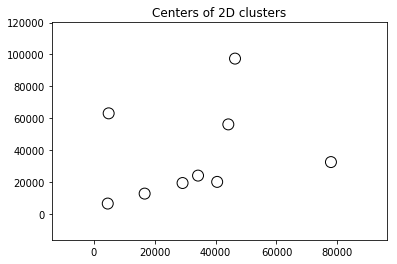

In [100]:
import csv

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth

# Load data from input file
input_file = 'C:\\Users\\HP\\OneDrive\\GitHub\\Artificial-Intelligence-with-Python\\Chapter 04\\code\\sales.csv'
file_reader = csv.reader(open(input_file, 'r'), delimiter=',')
X = []
for count, row in enumerate(file_reader):
    if not count:
        names = row[1:]
        continue

    X.append([float(x) for x in row[1:]])

# Convert to numpy array
X = np.array(X)

# Estimating the bandwidth of input data
bandwidth = estimate_bandwidth(X, quantile=0.8, n_samples=len(X))

# Compute clustering with MeanShift
meanshift_model = MeanShift(bandwidth=bandwidth, bin_seeding=True)
meanshift_model.fit(X)
labels = meanshift_model.labels_
cluster_centers = meanshift_model.cluster_centers_
num_clusters = len(np.unique(labels))

print("\nNumber of clusters in input data =", num_clusters)

print("\nCenters of clusters:")
print('\t'.join([name[:3] for name in names]))
for cluster_center in cluster_centers:
    print('\t'.join([str(int(x)) for x in cluster_center]))

# Extract two features for visualization 
cluster_centers_2d = cluster_centers[:, 1:3]

# Plot the cluster centers 
plt.figure()
plt.scatter(cluster_centers_2d[:,0], cluster_centers_2d[:,1], 
        s=120, edgecolors='black', facecolors='none')

offset = 0.25
plt.xlim(cluster_centers_2d[:,0].min() - offset * cluster_centers_2d[:,0].ptp(),
        cluster_centers_2d[:,0].max() + offset * cluster_centers_2d[:,0].ptp(),)
plt.ylim(cluster_centers_2d[:,1].min() - offset * cluster_centers_2d[:,1].ptp(),
        cluster_centers_2d[:,1].max() + offset * cluster_centers_2d[:,1].ptp())

plt.title('Centers of 2D clusters')
plt.show()



## olivetti_faces data

In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory



# 1.0 Call libraries
# For data manipulation
import numpy as np

# 1.1 For plotting faces
import matplotlib.pyplot as plt   
from skimage.io import imshow




# 1.2 Our dataset is here
from sklearn.datasets import fetch_olivetti_faces

# 1.3 Regressors
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV


In [13]:

    
data_imgs = np.load("C:\\Users\\HP\\OneDrive\\book\\machinelearning\\olivetti_faces.npy")
data_imgs.shape   

type(data_imgs) 
    

numpy.ndarray

In [14]:
targets = np.load("C:\\Users\\HP\\OneDrive\\book\\machinelearning\\olivetti_faces_target.npy")
targets.shape 
type(targets)


# 4. Images next
data_imgs # Image is 400X 64 X 64
data_imgs.shape

(400, 64, 64)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

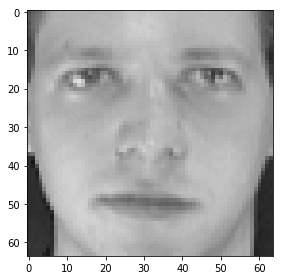

In [15]:
# 4.1 See an image
firstImage = data_imgs[0]
imshow(firstImage) 


# 5.0 Flatten each image
data = data_imgs.reshape(data_imgs.shape[0], data_imgs.shape[1] * data_imgs.shape[2])     # 64 X 64 = 4096
# 5.1 Flattened 64 X 64 array
data.shape                                # 400 X 4096

# 6.0 Patition datasets into two (fancy indexing)
targets < 30      

In [16]:
train = data[targets < 30]  # First 30 types of images out of 40 ie 30 * 10 =300
test = data[targets >= 30]  # Test on rest independent people  10 * 10 = 100


# 7.0 Test on a subset of people
#     Generate 10 random integers between 0 and 100
n_faces = test.shape[0]//10             # // is unconditionally "flooring division",
n_faces
face_ids = np.random.randint(0 , 100, size =n_faces)
face_ids
# 7.1 So we have n_faces random-faces from within 1 to 100
test = test[face_ids, :]   

In [17]:

# 8.0 Total pixels in any image
n_pixels = data.shape[1]

# 8.1 Select upper half of the faces as predictors
X_train = train[:, :(n_pixels + 1) // 2]    # // is unconditionally "flooring division",
                                            #    3.1//1.2 = 2.0
# 8.2 Lower half of the faces will be target(s)                 
y_train = train[:, n_pixels // 2:]

# 9.0 Similarly for test data. Upper and lower half
X_test = test[:, :(n_pixels + 1) // 2]
y_test = test[:, n_pixels // 2:]



In [18]:

# 9. Fit multi-output estimators
#  Experiment with more mulit-output regressors (such as RandomForestRegressor)
#  http://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble

# Prepare a dictionary of estimators after instantiating each one of them
ESTIMATORS = {
    "Extra trees": ExtraTreesRegressor(n_estimators=10,
                                       max_features=32,     # Out of 20000
                                       random_state=0),
    "K-nn": KNeighborsRegressor(),                          # Accept default parameters
    "Linear regression": LinearRegression(),
    "Ridge": RidgeCV(),
}


In [19]:
# 9.1 Create an empty dictionary to collect prediction values
y_test_predict = dict()

# 10. Fit each model by turn and make predictions
#     Iterate over dict items. Each item is a tuple: ( name,estimator-object)s
for name, estimator in ESTIMATORS.items():     
    estimator.fit(X_train, y_train)                    # fit() with instantiated object
    y_test_predict[name] = estimator.predict(X_test)   # Make predictions and save it in dict under key: name
                                                       # Note that output of estimator.predict(X_test) is prediction for
                                                       #  all the test images and NOT one (or one-by-one)
# 10.1 Just check    
y_test_predict


{'Extra trees': array([[0.51983471, 0.52809917, 0.49628099, ..., 0.23966942, 0.25909091,
         0.27933885],
        [0.65495868, 0.68842976, 0.72107438, ..., 0.19173554, 0.1714876 ,
         0.17396694],
        [0.43223141, 0.48099174, 0.46694214, ..., 0.29710744, 0.32809918,
         0.33677686],
        ...,
        [0.48305785, 0.48347107, 0.47975206, ..., 0.28553719, 0.28016529,
         0.27768595],
        [0.47479339, 0.51280992, 0.5409091 , ..., 0.32727273, 0.29958678,
         0.29214876],
        [0.49793389, 0.51983471, 0.51033058, ..., 0.23512397, 0.2446281 ,
         0.27066115]]),
 'K-nn': array([[0.5173553 , 0.538843  , 0.54545456, ..., 0.2570248 , 0.30082646,
         0.34545454],
        [0.6702479 , 0.71487606, 0.7272727 , ..., 0.16115704, 0.17685951,
         0.18099174],
        [0.4338843 , 0.46115702, 0.4892562 , ..., 0.37107438, 0.3628099 ,
         0.33305785],
        ...,
        [0.39586776, 0.4380165 , 0.47438017, ..., 0.3066116 , 0.2942149 ,
         0.

In [20]:
# 10.2 Just check shape of one of them
y_test_predict['Ridge'].shape    # 5 X 2048    

## Processing output
# 11. Each face should have this dimension
image_shape = (64, 64)

## 11.1 For 'Ridge' regression
##      We will have total images as follows:
#      Per esimator, we will have n_faces * 2
#      So total - n_estimators * n_faces * 2
#      Fig size should be accordingly drawn


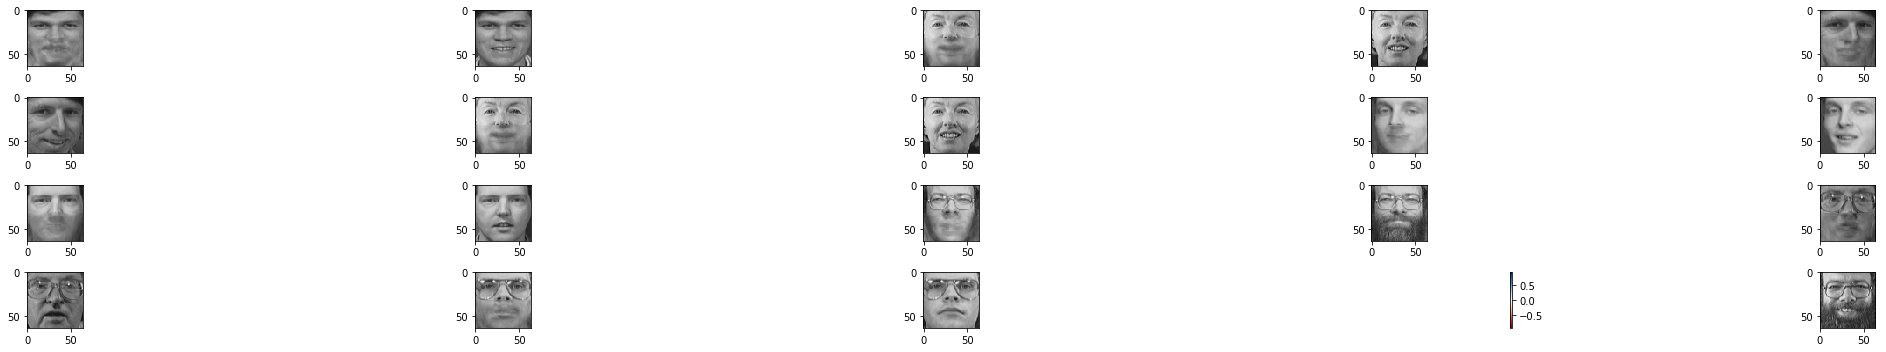

In [21]:
# 11.2 Total faces per estimator: 2 * n_faces

plt.figure(figsize=( 2 * n_faces * 2, 5))
j = 0
for i in range(n_faces):
    actual_face =    test[i].reshape(image_shape)
    completed_face = np.hstack((X_test[i], y_test_predict['Ridge'][i]))
    j = j+1
    plt.subplot(4,5,j)
    y = actual_face.reshape(image_shape)
    x = completed_face.reshape(image_shape)
    imshow(x)
    j = j+1
    plt.subplot(4,5,j)
    x = completed_face.reshape(image_shape)
    imshow(y)
plt.show()
    

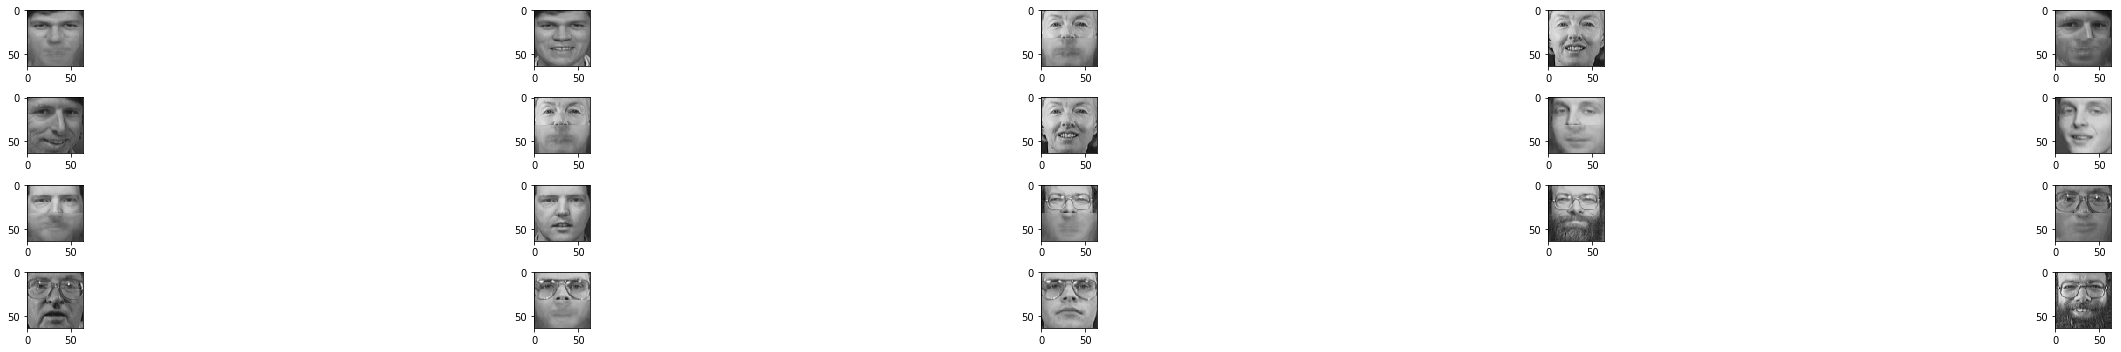

In [22]:
## 12. For 'Extra trees' regression
plt.figure(figsize=( 2 * n_faces * 2, 5))
j = 0
for i in range(n_faces):
    actual_face =    test[i].reshape(image_shape)
    completed_face = np.hstack((X_test[i], y_test_predict['Extra trees'][i]))
    j = j+1
    plt.subplot(4,5,j)
    y = actual_face.reshape(image_shape)
    x = completed_face.reshape(image_shape)
    imshow(x)
    j = j+1
    plt.subplot(4,5,j)
    x = completed_face.reshape(image_shape)
    imshow(y)
  
plt.show()


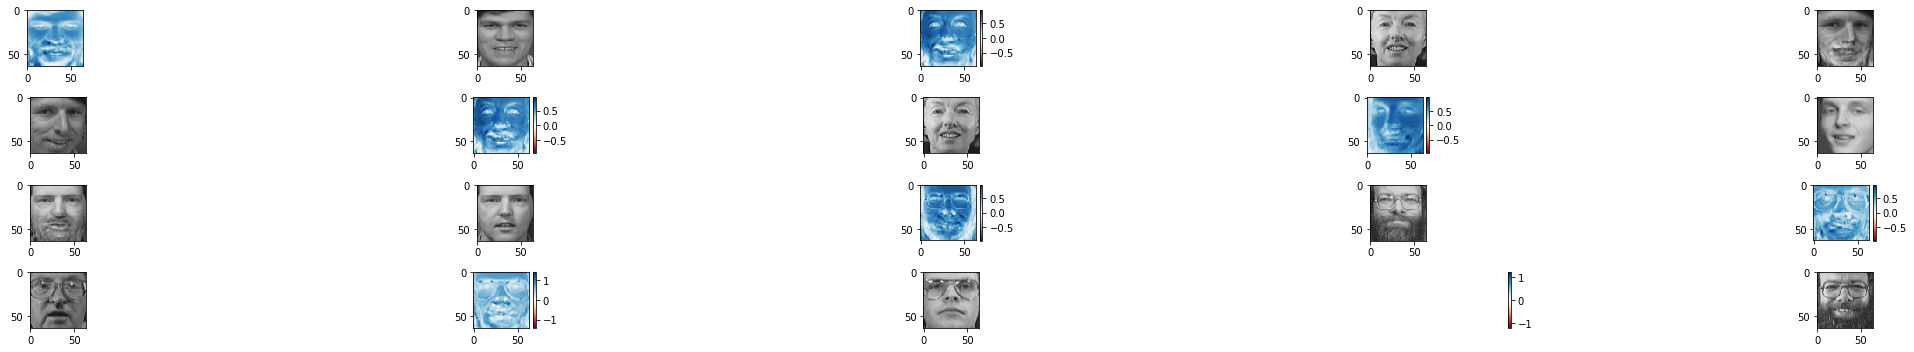

In [23]:
## 13. For 'Linear regression' regression
plt.figure(figsize=( 2 * n_faces * 2, 5))
j = 0
for i in range(n_faces):
    actual_face =    test[i].reshape(image_shape)
    completed_face = np.hstack((X_test[i], y_test_predict['Linear regression'][i]))
    j = j+1
    plt.subplot(4,5,j)
    y = actual_face.reshape(image_shape)
    x = completed_face.reshape(image_shape)
    imshow(x)
    j = j+1
    plt.subplot(4,5,j)
    x = completed_face.reshape(image_shape)
    imshow(y)
  
plt.show()

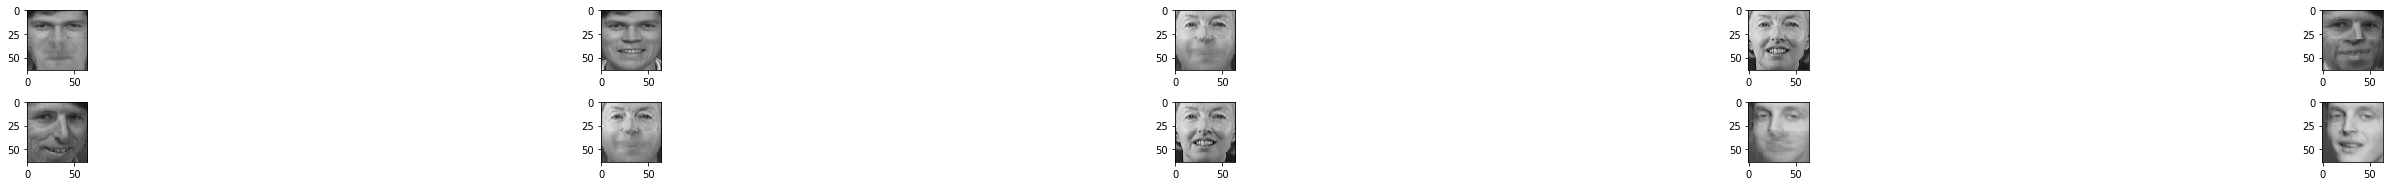

In [24]:
## For '"K-nn' regression
plt.figure(figsize=( 2 * n_faces * 2, 5))
j = 0
for i in range(5):
    actual_face =    test[i].reshape(image_shape)
    completed_face = np.hstack((X_test[i], y_test_predict['K-nn'][i]))
    j = j+1
    plt.subplot(4,5,j)
    y = actual_face.reshape(image_shape)
    x = completed_face.reshape(image_shape)
    imshow(x)
    j = j+1
    plt.subplot(4,5,j)
    x = completed_face.reshape(image_shape)
    imshow(y)
  
plt.show()

Automatically created module for IPython interactive environment
downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\HP\scikit_learn_data


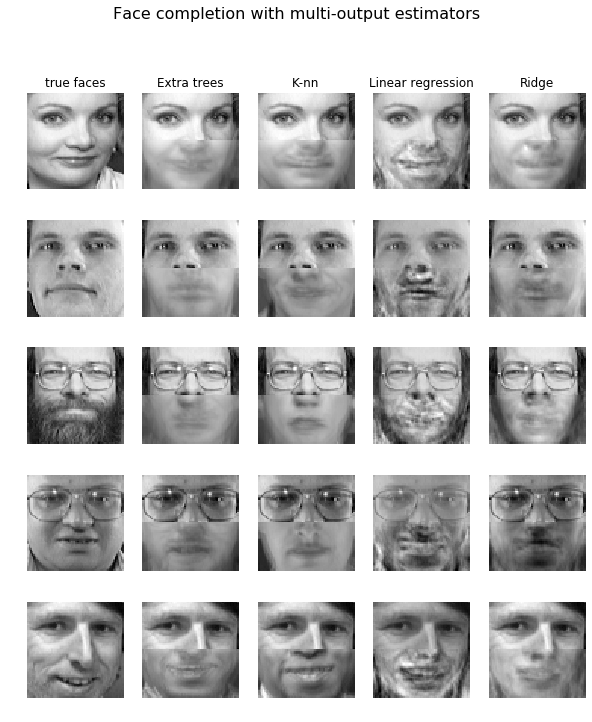

In [25]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn.utils.validation import check_random_state

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

# Load the faces datasets
data, targets = fetch_olivetti_faces(return_X_y=True)

train = data[targets < 30]
test = data[targets >= 30]  # Test on independent people

# Test on a subset of people
n_faces = 5
rng = check_random_state(4)
face_ids = rng.randint(test.shape[0], size=(n_faces, ))
test = test[face_ids, :]

n_pixels = data.shape[1]
# Upper half of the faces
X_train = train[:, :(n_pixels + 1) // 2]
# Lower half of the faces
y_train = train[:, n_pixels // 2:]
X_test = test[:, :(n_pixels + 1) // 2]
y_test = test[:, n_pixels // 2:]

# Fit estimators
ESTIMATORS = {
    "Extra trees": ExtraTreesRegressor(n_estimators=10, max_features=32,
                                       random_state=0),
    "K-nn": KNeighborsRegressor(),
    "Linear regression": LinearRegression(),
    "Ridge": RidgeCV(),
}

y_test_predict = dict()
for name, estimator in ESTIMATORS.items():
    estimator.fit(X_train, y_train)
    y_test_predict[name] = estimator.predict(X_test)

# Plot the completed faces
image_shape = (64, 64)

n_cols = 1 + len(ESTIMATORS)
plt.figure(figsize=(2. * n_cols, 2.26 * n_faces))
plt.suptitle("Face completion with multi-output estimators", size=16)

for i in range(n_faces):
    true_face = np.hstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1,
                          title="true faces")

    sub.axis("off")
    sub.imshow(true_face.reshape(image_shape),
               cmap=plt.cm.gray,
               interpolation="nearest")

    for j, est in enumerate(sorted(ESTIMATORS)):
        completed_face = np.hstack((X_test[i], y_test_predict[est][i]))

        if i:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j)

        else:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j,
                              title=est)

        sub.axis("off")
        sub.imshow(completed_face.reshape(image_shape),
                   cmap=plt.cm.gray,
                   interpolation="nearest")

plt.show()

## Boston Housing Dataset

In [31]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import pandas as pd
import seaborn as sb
import tensorflow as tf
from tensorflow import keras as ks

In [32]:
from tensorflow.estimator import LinearRegressor
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
print(tf.__version__)


2.0.0


In [36]:
 boston_load = datasets.load_boston()
feature_columns = boston_load.feature_names
target_column = boston_load.target
boston_data = pd.DataFrame(boston_load.data,columns=feature_columns).astype(np.float32)
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.199997,4.0900,1.0,296.0,15.300000,396.899994,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900002,4.9671,2.0,242.0,17.799999,396.899994,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.099998,4.9671,2.0,242.0,17.799999,392.829987,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.799999,6.0622,3.0,222.0,18.700001,394.630005,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200001,6.0622,3.0,222.0,18.700001,396.899994,5.33


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.199997,4.0900,1.0,296.0,15.300000,396.899994,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900002,4.9671,2.0,242.0,17.799999,396.899994,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.099998,4.9671,2.0,242.0,17.799999,392.829987,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.799999,6.0622,3.0,222.0,18.700001,394.630005,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200001,6.0622,3.0,222.0,18.700001,396.899994,5.33


In [37]:
boston_data['MEDV'] = target_column.astype(np.float32)
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.199997,4.0900,1.0,296.0,15.300000,396.899994,4.98,24.000000
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900002,4.9671,2.0,242.0,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.099998,4.9671,2.0,242.0,17.799999,392.829987,4.03,34.700001
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.799999,6.0622,3.0,222.0,18.700001,394.630005,2.94,33.400002
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200001,6.0622,3.0,222.0,18.700001,396.899994,5.33,36.200001


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.199997,4.0900,1.0,296.0,15.300000,396.899994,4.98,24.000000
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900002,4.9671,2.0,242.0,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.099998,4.9671,2.0,242.0,17.799999,392.829987,4.03,34.700001
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.799999,6.0622,3.0,222.0,18.700001,394.630005,2.94,33.400002
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200001,6.0622,3.0,222.0,18.700001,396.899994,5.33,36.200001


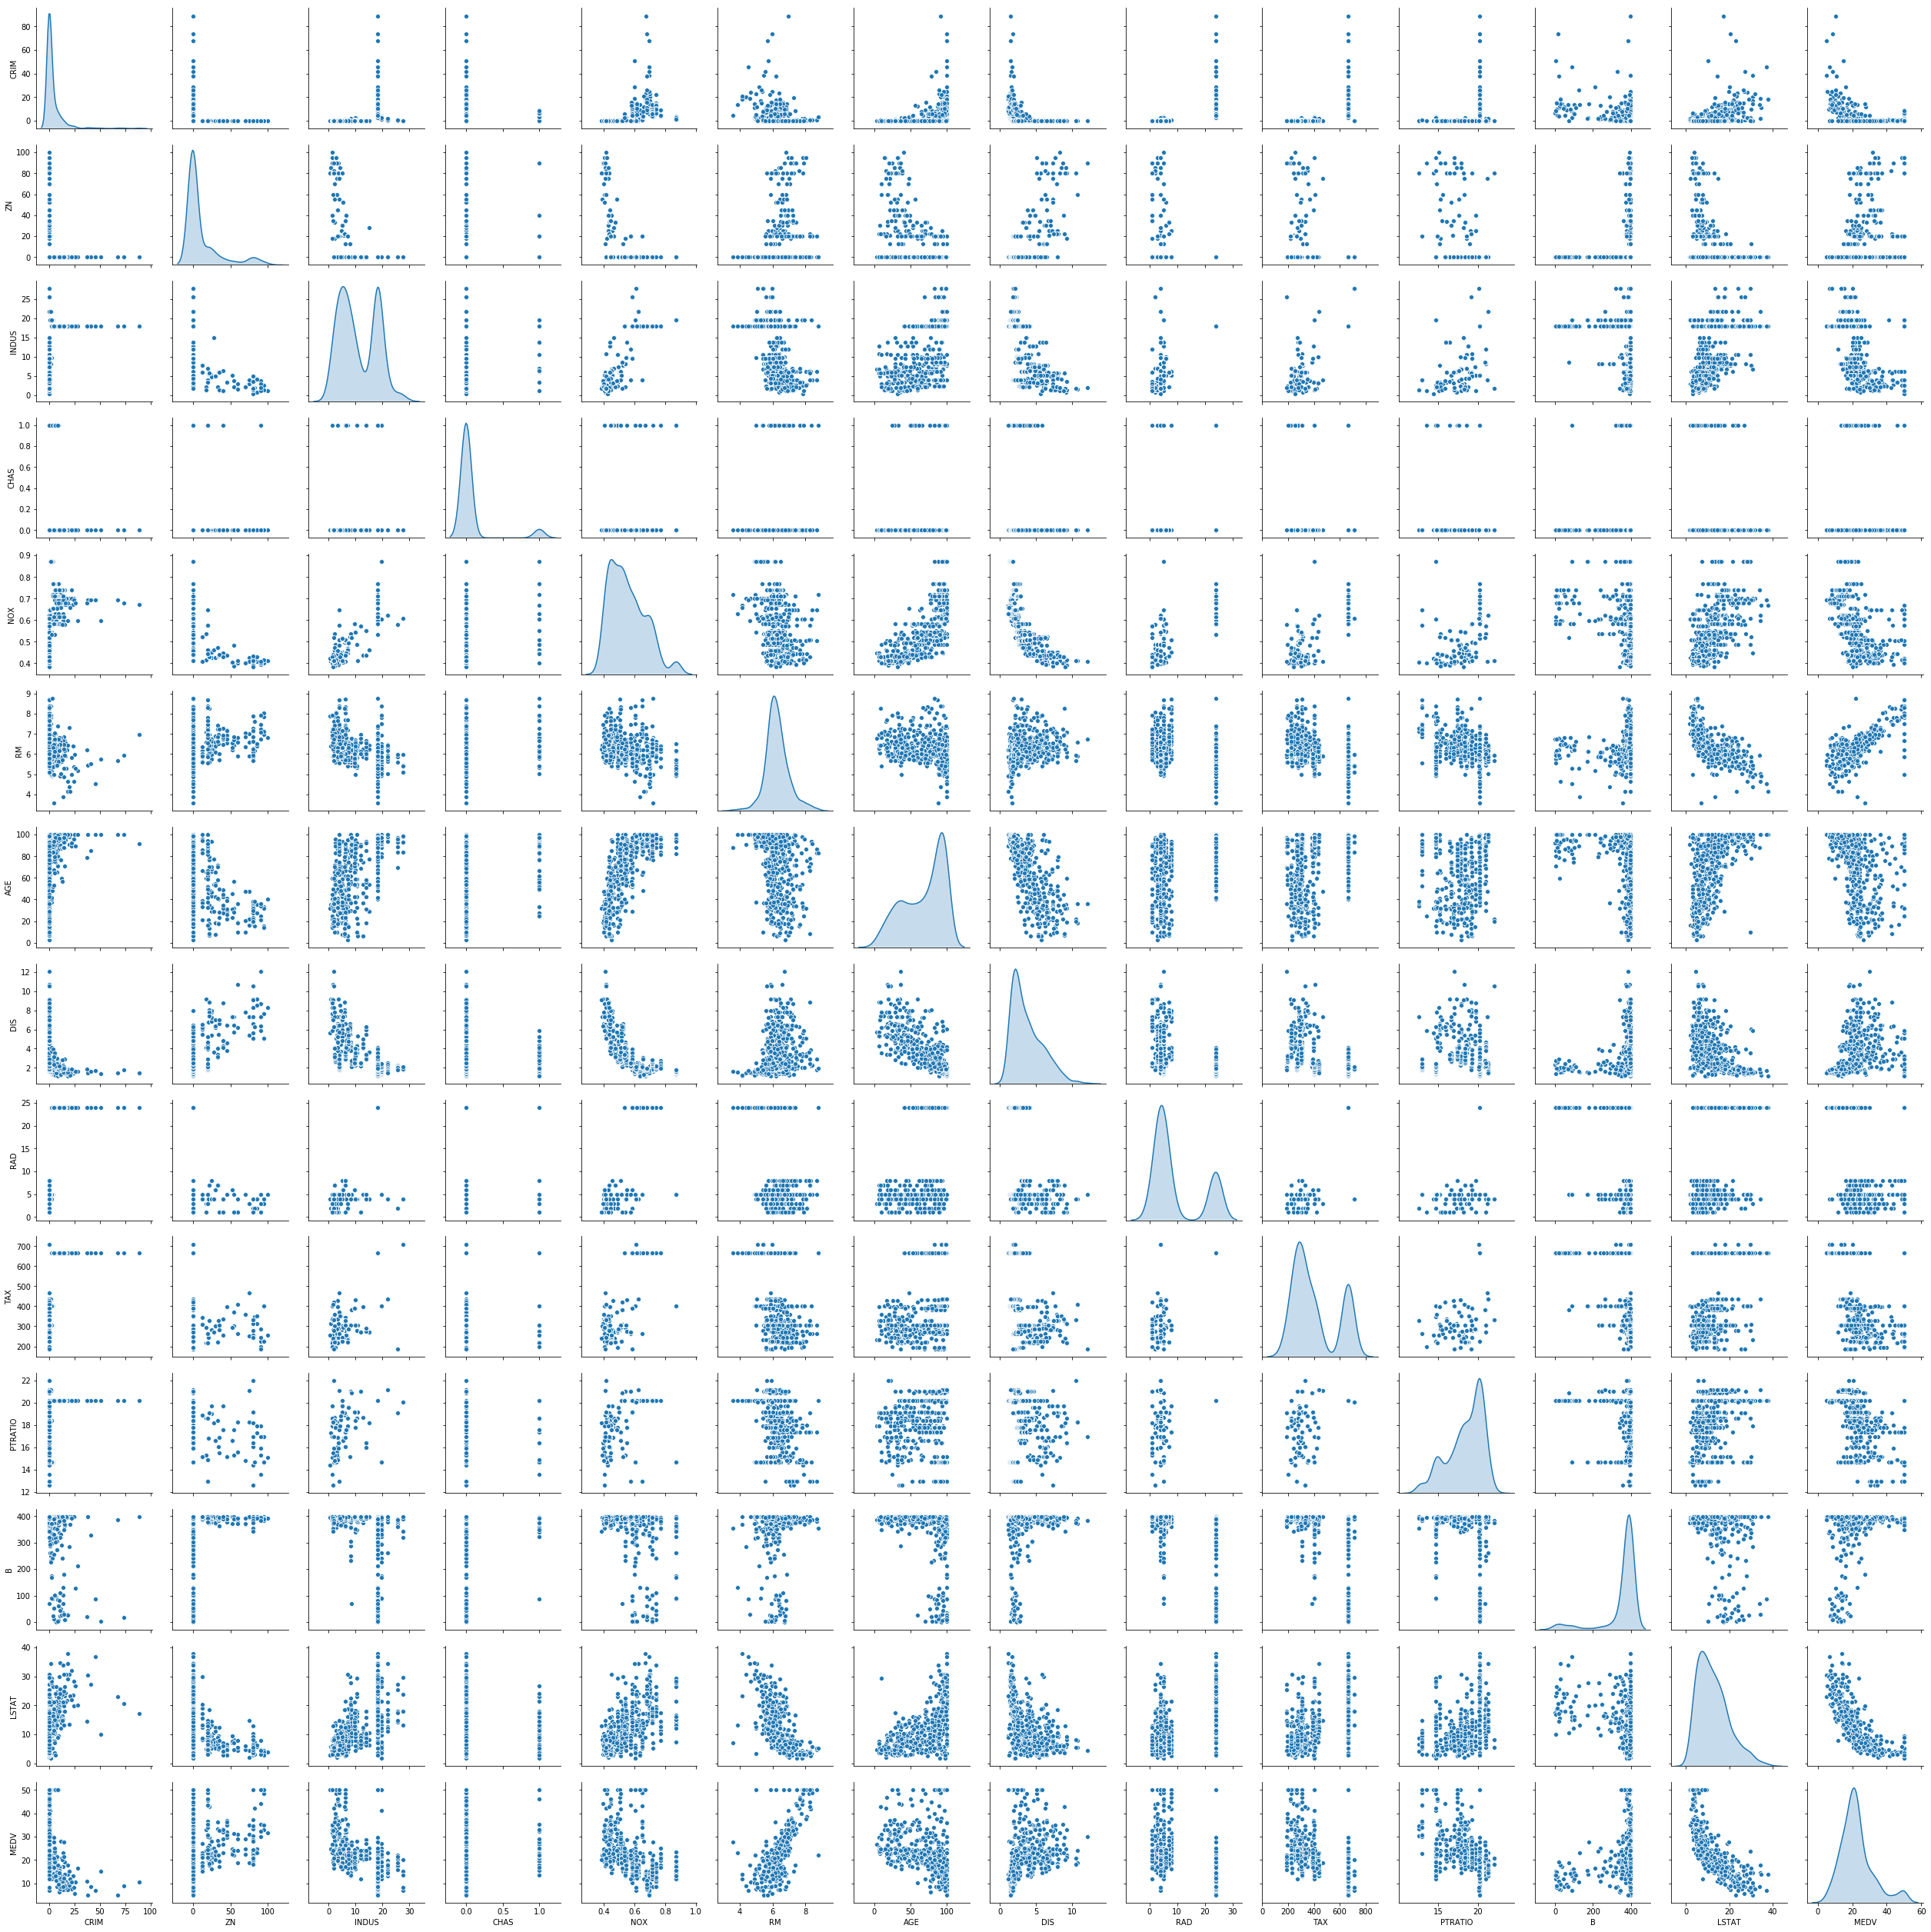

In [38]:
 sb.pairplot(boston_data, diag_kind="kde")


In [39]:
correlation_data = boston_data.corr()
correlation_data.style.background_gradient(cmap='coolwarm', axis=None)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1,-0.200469,0.406583,-0.0558916,0.420972,-0.219247,0.352734,-0.37967,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1,-0.533828,-0.0426967,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.17552,-0.412995,0.360445
INDUS,0.406583,-0.533828,1,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.72076,0.383248,-0.356977,0.6038,-0.483725
CHAS,-0.0558916,-0.0426967,0.062938,1,0.0912028,0.0912512,0.0865178,-0.0991758,-0.00736824,-0.0355865,-0.121515,0.0487885,-0.0539293,0.17526
NOX,0.420972,-0.516604,0.763651,0.0912028,1,-0.302188,0.73147,-0.76923,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.0912512,-0.302188,1,-0.240265,0.205246,-0.209847,-0.292048,-0.355502,0.128069,-0.613808,0.69536
AGE,0.352734,-0.569537,0.644779,0.0865178,0.73147,-0.240265,1,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.37967,0.664408,-0.708027,-0.0991758,-0.76923,0.205246,-0.747881,1,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.00736824,0.611441,-0.209847,0.456022,-0.494588,1,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.72076,-0.0355865,0.668023,-0.292048,0.506456,-0.534432,0.910228,1,0.460853,-0.441808,0.543993,-0.468536


In [40]:
# Descriptive statistics—central tendency and dispersion
stats = boston_data.describe()
boston_stats = stats.transpose()
boston_stats

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613523,8.601545,0.00632,0.082045,0.256510,3.677083,88.976196
ZN,506.0,11.363636,23.322390,0.00000,0.000000,0.000000,12.500000,100.000000
INDUS,506.0,11.136797,6.860355,0.46000,5.190000,9.690000,18.100000,27.740000
CHAS,506.0,0.069170,0.253993,0.00000,0.000000,0.000000,0.000000,1.000000
NOX,506.0,0.554696,0.115878,0.38500,0.449000,0.538000,0.624000,0.871000
...,...,...,...,...,...,...,...,...
TAX,506.0,408.237152,168.537170,187.00000,279.000000,330.000000,666.000000,711.000000
PTRATIO,506.0,18.455584,2.164946,12.60000,17.400000,19.050000,20.200001,22.000000
B,506.0,356.674561,91.294838,0.32000,375.377487,391.440002,396.225006,396.899994
LSTAT,506.0,12.653064,7.141063,1.73000,6.950000,11.360000,16.954999,37.970001


,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613523,8.601545,0.00632,0.082045,0.256510,3.677083,88.976196
ZN,506.0,11.363636,23.322390,0.00000,0.000000,0.000000,12.500000,100.000000
INDUS,506.0,11.136797,6.860355,0.46000,5.190000,9.690000,18.100000,27.740000
CHAS,506.0,0.069170,0.253993,0.00000,0.000000,0.000000,0.000000,1.000000
NOX,506.0,0.554696,0.115878,0.38500,0.449000,0.538000,0.624000,0.871000
...,...,...,...,...,...,...,...,...
TAX,506.0,408.237152,168.537170,187.00000,279.000000,330.000000,666.000000,711.000000
PTRATIO,506.0,18.455584,2.164946,12.60000,17.400000,19.050000,20.200001,22.000000
B,506.0,356.674561,91.294838,0.32000,375.377487,391.440002,396.225006,396.899994
LSTAT,506.0,12.653064,7.141063,1.73000,6.950000,11.360000,16.954999,37.970001


In [42]:
# Select the required columns
X_data = boston_data[[i for i in boston_data.columns if i not in ['MEDV']]]
Y_data = boston_data[['MEDV']]

In [43]:
#Train the test split.
training_features , test_features ,training_labels, test_labels = train_test_split(X_data , Y_data , test_size=0.2)
print('No. of rows in Training Features: ', training_features.shape[0])
print('No. of rows in Test Features: ', test_features.shape[0])
print('No. of columns in Training Features: ', training_features.shape[1])
print('No. of columns in Test Features: ', test_features.shape[1])
print('No. of rows in Training Label: ', training_labels.shape[0])
print('No. of rows in Test Label: ', test_labels.shape[0])
print('No. of columns in Training Label: ', training_labels.shape[1])
print('No. of columns in Test Label: ', test_labels.shape[1])

No. of rows in Training Features:  404
No. of rows in Test Features:  102
No. of columns in Training Features:  13
No. of columns in Test Features:  13
No. of rows in Training Label:  404
No. of rows in Test Label:  102
No. of columns in Training Label:  1
No. of columns in Test Label:  1


In [47]:
# Normalize the data
def norm(x):
 stats = x.describe()
 stats = stats.transpose()
 return (x - stats['mean']) / stats['std']
normed_train_features = norm(training_features)
normed_test_features = norm(test_features)

In [95]:
#Build the input pipeline for the TensorFlow model.
def feed_input(features_dataframe, target_dataframe, num_of_epochs=10, shuffle=True, batch_size=32):
  def input_feed_function():
    dataset = tf.data.Dataset.from_tensor_slices((dict(features_dataframe), target_dataframe))
    if shuffle:
      dataset = dataset.shuffle(2000)
    dataset = dataset.batch(batch_size).repeat(num_of_epochs)
    return dataset
  return input_feed_function

train_feed_input = feed_input(normed_train_features, training_labels)
train_feed_input_testing = feed_input(normed_train_features, training_labels, num_of_epochs=1, shuffle=False)
test_feed_input = feed_input(normed_test_features, test_labels, num_of_epochs=1, shuffle=False)


feature_columns_numeric = [tf.feature_column.numeric_column(m) for m in training_features.columns]
linear_model = LinearRegressor(feature_columns=feature_columns_numeric, optimizer='RMSProp')
linear_model.train(train_feed_input)


W1224 14:38:42.366867 23872 estimator.py:1821] Using temporary folder as model directory: C:\Users\HP\AppData\Local\Temp\tmpkwquznj2


In [96]:
# Predictions
train_predictions = linear_model.predict(train_feed_input_testing)
test_predictions = linear_model.predict(test_feed_input)


In [97]:
#train_predictions_series = pd.Series([p['predictions'][0]
#for p in train_predictions])


train_predictions_series = pd.Series([p['predictions'][0] for p in train_predictions])
test_predictions_series = pd.Series([p['predictions'][0] for p in test_predictions])




In [92]:
train_predictions_df = pd.DataFrame(train_predictions_series, columns=['predictions'])
test_predictions_df = pd.DataFrame(test_predictions_series, columns=['predictions'])

training_labels.reset_index(drop=True, inplace=True)
train_predictions_df.reset_index(drop=True, inplace=True)

test_labels.reset_index(drop=True, inplace=True)
test_predictions_df.reset_index(drop=True, inplace=True)

train_labels_with_predictions_df = pd.concat([training_labels, train_predictions_df], axis=1)
test_labels_with_predictions_df = pd.concat([test_labels, test_predictions_df], axis=1)

In [98]:
 # Validation


def calculate_errors_and_r2(y_true, y_pred):
  mean_squared_err = (mean_squared_error(y_true, y_pred))
  root_mean_squared_err = np.sqrt(mean_squared_err)
  r2 = round(r2_score(y_true, y_pred)*100,0)
  return mean_squared_err, root_mean_squared_err, r2




In [99]:
train_mean_squared_error, train_root_mean_squared_error, train_r2_score_percentage = calculate_errors_and_r2(training_labels, train_predictions_series)
test_mean_squared_error, test_root_mean_squared_error, test_r2_score_percentage = calculate_errors_and_r2(test_labels, test_predictions_series)

print('Training Data Mean Squared Error = ', train_mean_squared_error)
print('Training Data Root Mean Squared Error = ', train_root_mean_squared_error)
print('Training Data R2 = ', train_r2_score_percentage)

print('Test Data Mean Squared Error = ', test_mean_squared_error)
print('Test Data Root Mean Squared Error = ', test_root_mean_squared_error)
print('Test Data R2 = ', test_r2_score_percentage)

Training Data Mean Squared Error =  80.01629358199604
Training Data Root Mean Squared Error =  8.945182702549793
Training Data R2 =  4.0
Test Data Mean Squared Error =  94.48663090959292
Test Data Root Mean Squared Error =  9.720423391478013
Test Data R2 =  -6.0
